In [1]:
pip install yfinance --user

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

google = yf.Ticker("GOOG")

In [3]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-05-02 09:30:00-04:00  166.589996  167.000000  166.229996  166.339996   
2024-05-02 09:31:00-04:00  166.279999  166.520004  165.949997  165.949997   
2024-05-02 09:32:00-04:00  165.960007  166.089996  165.830002  165.860001   
2024-05-02 09:33:00-04:00  165.854294  166.770004  165.690002  166.389999   
2024-05-02 09:34:00-04:00  166.364304  166.770004  166.229996  166.270004   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2024-05-02 09:30:00-04:00  668110        0.0           0.0  
2024-05-02 09:31:00-04:00  134497        0.0           0.0  
2024-05-02 09:32:00-04:00   94659        0.0           0.0  
2024-05-02 09:33:00-04:00  122151        0.0           0.0  
2024-05-02 09:34:00-04:00   90032        0.0           0.0  


In [4]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2024-05-02 09:30:00-04:00,166.229996
2024-05-02 09:31:00-04:00,165.949997
2024-05-02 09:32:00-04:00,165.830002
2024-05-02 09:33:00-04:00,165.690002
2024-05-02 09:34:00-04:00,166.229996


In [5]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,166.229996
09:31:00,165.949997
09:32:00,165.830002
09:33:00,165.690002
09:34:00,166.229996


In [32]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
train_df = df[:-offset]
test_df = df[-offset:]

In [33]:
X_train = np.arange(len(train_df))
y_train = train_df['Low'].values
X_test = np.arange(len(train_df), len(df))
y_test = test_df['Low'].values

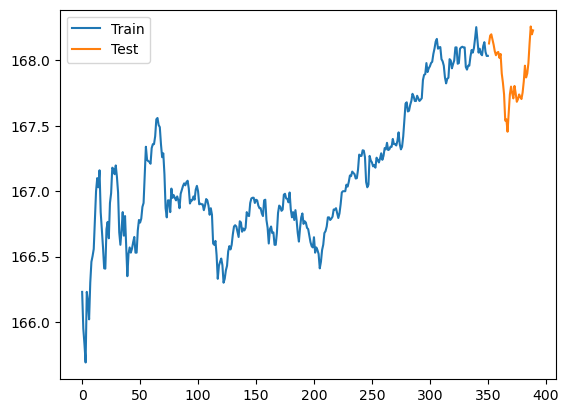

In [7]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [34]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

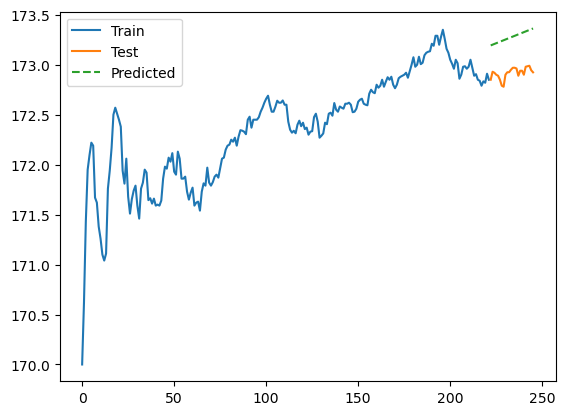

In [37]:
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.show()

In [38]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.13300392967977337
